### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [521]:
### Data Collection
import pandas_datareader as pdr
key=""

In [522]:
import pandas as pd

In [523]:
df_train = pd.read_csv("/content/training_jumlah_penumpang_tj.csv", sep=',')
df_train = df_train[['date','jumlah_penumpang']]
df_train = df_train[64:]
print(df_train)

           date  jumlah_penumpang
64   2020-05-01           2282000
65   2020-06-01           4228000
66   2020-07-01           5515000
67   2020-08-01           5442000
68   2020-09-01           4782000
69   2020-10-01           4265000
70   2020-11-01           5414000
71   2020-12-01           5302000
72   2021-01-01           9964000
73   2021-02-01           9536000
74   2021-03-01          11758000
75   2021-04-01          11844000
76   2021-05-01          10982000
77   2021-06-01          11234000
78   2021-07-01           6648000
79   2021-08-01           6585000
80   2021-09-01           8655000
81   2021-10-01          10801000
82   2021-11-01          12603000
83   2021-12-01          13202000
84   2022-01-01          14323000
85   2022-02-01          10550000
86   2022-03-01          14430000
87   2022-04-01          13756000
88   2022-05-01          13624000
89   2022-06-01          16689000
90   2022-07-01          16774000
91   2022-08-01          17870000
92   2022-09-0

In [524]:
df1=df_train.reset_index()['jumlah_penumpang']

In [525]:
df1

,jumlah_penumpang
0,2282000
1,4228000
2,5515000
3,5442000
4,4782000
5,4265000
6,5414000
7,5302000
8,9964000
9,9536000


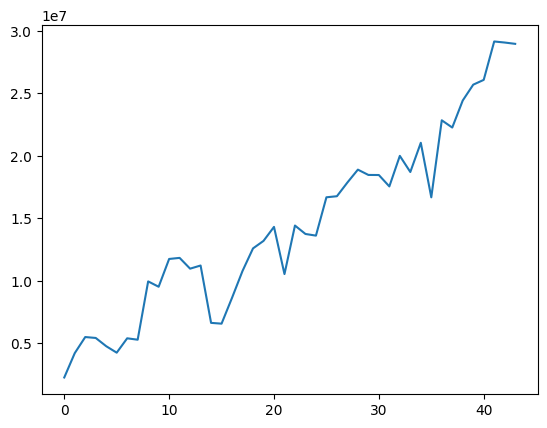

In [526]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [527]:
import numpy as np

In [528]:
df1

,jumlah_penumpang
0,2282000
1,4228000
2,5515000
3,5442000
4,4782000
5,4265000
6,5414000
7,5302000
8,9964000
9,9536000


In [529]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [530]:
print(df1)

[[0.        ]
 [0.07243699]
 [0.12034367]
 [0.11762635]
 [0.09305882]
 [0.07381426]
 [0.11658409]
 [0.11241506]
 [0.28595114]
 [0.27001947]
 [0.35273015]
 [0.35593138]
 [0.3238447 ]
 [0.33322503]
 [0.16251792]
 [0.16017284]
 [0.23722555]
 [0.31710724]
 [0.38418404]
 [0.40648093]
 [0.4482085 ]
 [0.30776413]
 [0.45219142]
 [0.42710276]
 [0.42218926]
 [0.53627937]
 [0.53944337]
 [0.58024036]
 [0.61858059]
 [0.60279782]
 [0.60253725]
 [0.56862662]
 [0.65957498]
 [0.61151858]
 [0.6984876 ]
 [0.53620385]
 [0.76543277]
 [0.74383605]
 [0.82436525]
 [0.87145711]
 [0.8856998 ]
 [1.        ]
 [0.99686771]
 [0.99295921]]


In [531]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.9)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [532]:
training_size,test_size

(39, 5)

In [533]:
train_data

array([[0.        ],
       [0.07243699],
       [0.12034367],
       [0.11762635],
       [0.09305882],
       [0.07381426],
       [0.11658409],
       [0.11241506],
       [0.28595114],
       [0.27001947],
       [0.35273015],
       [0.35593138],
       [0.3238447 ],
       [0.33322503],
       [0.16251792],
       [0.16017284],
       [0.23722555],
       [0.31710724],
       [0.38418404],
       [0.40648093],
       [0.4482085 ],
       [0.30776413],
       [0.45219142],
       [0.42710276],
       [0.42218926],
       [0.53627937],
       [0.53944337],
       [0.58024036],
       [0.61858059],
       [0.60279782],
       [0.60253725],
       [0.56862662],
       [0.65957498],
       [0.61151858],
       [0.6984876 ],
       [0.53620385],
       [0.76543277],
       [0.74383605],
       [0.82436525]])

In [534]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [535]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [536]:
print(X_train.shape), print(y_train.shape)

(37, 1)
(37,)


(None, None)

In [537]:
print(X_test.shape), print(ytest.shape)

(3, 1)
(3,)


(None, None)

In [538]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [539]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [540]:
# model=Sequential()
# model.add(LSTM(4,return_sequences=True,input_shape=(1,time_step)))
# model.add(LSTM(4,return_sequences=True))
# model.add(LSTM(4))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')

model = Sequential()
model.add(LSTM(4, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [541]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 4)                 96        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [542]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=2)

Epoch 1/100
37/37 - 3s - loss: 0.2115 - val_loss: 0.9405 - 3s/epoch - 86ms/step
Epoch 2/100
37/37 - 0s - loss: 0.1567 - val_loss: 0.7936 - 115ms/epoch - 3ms/step
Epoch 3/100
37/37 - 0s - loss: 0.1160 - val_loss: 0.6623 - 102ms/epoch - 3ms/step
Epoch 4/100
37/37 - 0s - loss: 0.0855 - val_loss: 0.5485 - 118ms/epoch - 3ms/step
Epoch 5/100
37/37 - 0s - loss: 0.0646 - val_loss: 0.4507 - 103ms/epoch - 3ms/step
Epoch 6/100
37/37 - 0s - loss: 0.0496 - val_loss: 0.3833 - 131ms/epoch - 4ms/step
Epoch 7/100
37/37 - 0s - loss: 0.0407 - val_loss: 0.3267 - 100ms/epoch - 3ms/step
Epoch 8/100
37/37 - 0s - loss: 0.0355 - val_loss: 0.2830 - 96ms/epoch - 3ms/step
Epoch 9/100
37/37 - 0s - loss: 0.0325 - val_loss: 0.2533 - 103ms/epoch - 3ms/step
Epoch 10/100
37/37 - 0s - loss: 0.0315 - val_loss: 0.2188 - 103ms/epoch - 3ms/step
Epoch 11/100
37/37 - 0s - loss: 0.0298 - val_loss: 0.2068 - 129ms/epoch - 3ms/step
Epoch 12/100
37/37 - 0s - loss: 0.0288 - val_loss: 0.2043 - 104ms/epoch - 3ms/step
Epoch 13/100
37/

In [543]:
import tensorflow as tf

In [544]:
tf.__version__

'2.15.0'

In [545]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [546]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [547]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

13737242.30109427

In [548]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

27083299.655534405

In [549]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(y_train,train_predict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(ytest,test_predict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 13737242.30 RMSE
Test Score: 27083299.66 RMSE


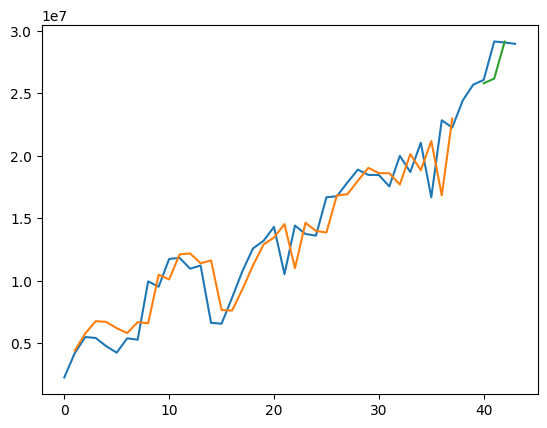

In [550]:
### Plotting
# shift train predictions for plotting
look_back=1
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [551]:
len(test_data)

5

In [552]:
x_input=test_data[4:].reshape(1,-1)
x_input.shape


(1, 1)

In [553]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [554]:
temp_input

[0.9929592068470149]

In [555]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=1
i=0
while(i<6):

    if(len(temp_input)>1):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9930583]
2
1 day input [0.99305832]
1 day output [[0.9931524]]
2 day input [0.99315238]
2 day output [[0.99324167]]
3 day input [0.99324167]
3 day output [[0.99332666]]
4 day input [0.99332666]
4 day output [[0.99340725]]
5 day input [0.99340725]
5 day output [[0.9934838]]
[[0.9930583238601685], [0.993152379989624], [0.9932416677474976], [0.9933266639709473], [0.9934072494506836], [0.9934837818145752]]


In [556]:
day_new=np.arange(1,2)
day_pred=np.arange(2,8)

In [557]:
import matplotlib.pyplot as plt

In [558]:
len(df1)

44

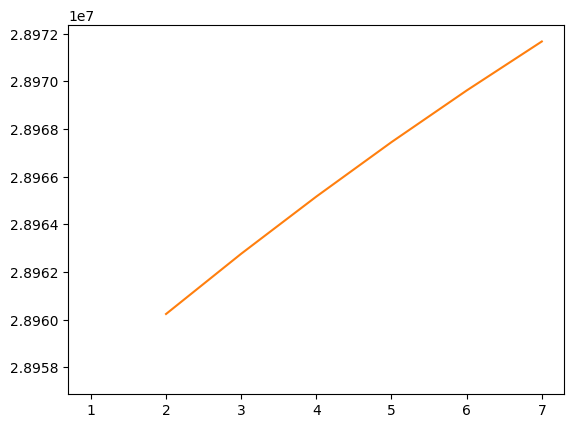

In [559]:
plt.plot(day_new,scaler.inverse_transform(df1[43:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

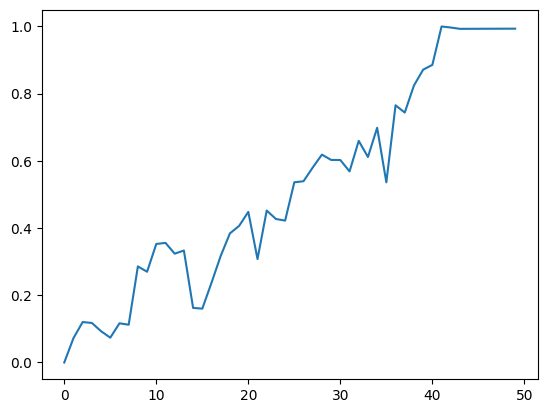

In [560]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3)

In [561]:
df3=scaler.inverse_transform(df3).tolist()

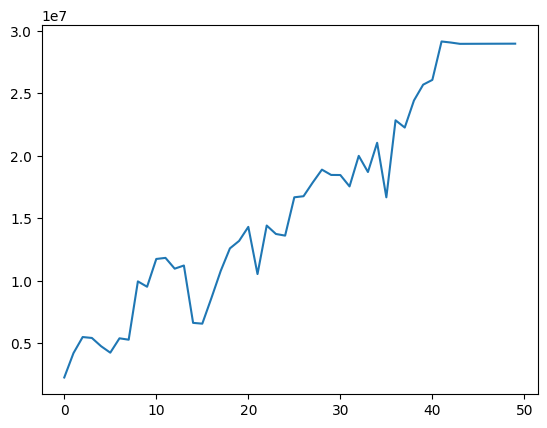

In [562]:
plt.plot(df3)

In [563]:
print(df3)

[[2282000.0], [4228000.0], [5515000.0], [5442000.0], [4782000.0], [4265000.0], [5414000.0], [5302000.0], [9964000.0], [9536000.0], [11758000.0], [11844000.0], [10982000.0], [11234000.0], [6648000.0], [6585000.000000001], [8655000.0], [10801000.0], [12603000.0], [13202000.0], [14323000.0], [10550000.0], [14429999.999999998], [13756000.0], [13624000.0], [16689000.000000002], [16774000.0], [17870000.0], [18900000.0], [18476000.0], [18469000.0], [17558000.0], [20001303.0], [18710281.0], [21046680.0], [16686971.0], [22845144.0], [22264954.0], [24428349.0], [25693459.0], [26076085.0], [29146728.999999996], [29062581.0], [28957580.0], [28960242.751697656], [28962769.54412627], [28965168.23554456], [28967451.63605356], [28969616.54312801], [28971672.564343687]]
